### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [72]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

#### Step 2. Multiple Variable Linear Regression

Loading the multi-variable linear regression model for testing

In [73]:
filename = 'LinearRegression_Models/B/B_MV_model_v7.sav'
model_C = pickle.load(open(filename, 'rb'))

Opening and parsing the test data CSV file, with the specific input features collected

In [74]:
mx_col = ['num_bed', 'num_bath', 'property_size', 'value_score', 'tot_rooms', 'suburb_median_income', 'suburb_lat', 'suburb_lng', 'km_from_cbd', 'ds_float', 'num_parking' ]
testing_data = pd.read_csv('B_testing_data/B_testing_data_new_2.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

#### Step 3

- Individually plotting test data features, targets and predictions from the model, on a graph for each input feature, with the purpose of visually evaluating the accuracy of the model

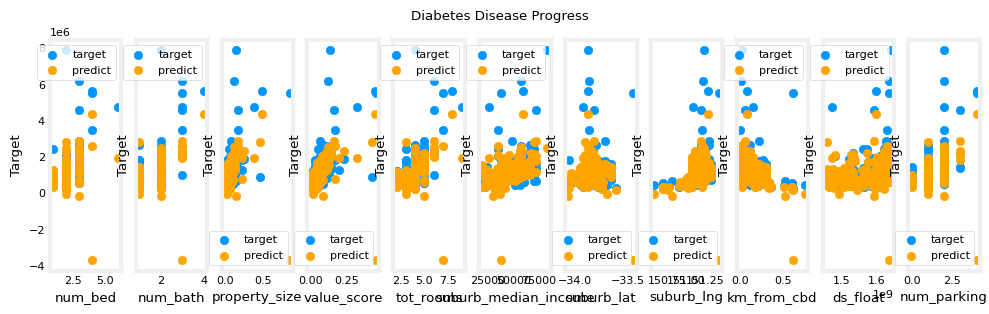

In [75]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [76]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.11579029632123394


- This is a very low score of 11%, and is indicative of the data bias which overrepresented houses, though that is the main form of property in sydney

#### Step 4

- You can do predictions to get a feel for the model

In [77]:
print(model_C.predict([[0.1,0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]))

[-1.0935164e+08]


#### Step 5

- Manually calculating the loss and cost of the model using testing data

In [78]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

     num_bed  num_bath  property_size  value_score  tot_rooms  \
0        3.0       1.0       0.082114     0.068358        4.0   
1        2.0       2.0       0.063415     0.034518        4.0   
2        2.0       1.0       0.072358     0.058542        3.0   
3        3.0       1.0       0.098374     0.087179        4.0   
4        2.0       2.0       0.079675     0.070842        4.0   
..       ...       ...            ...          ...        ...   
166      2.0       1.0       0.060976     0.055777        3.0   
167      2.0       1.0       0.029268     0.024880        3.0   
168      2.0       1.0       0.065854     0.060706        3.0   
169      2.0       1.0       0.030894     0.022817        3.0   
170      3.0       2.0       0.126016     0.108006        5.0   

     suburb_median_income  suburb_lat  suburb_lng  km_from_cbd      ds_float  \
0                 30628.0   -33.94831   151.07815     0.183354  1.572221e+09   
1                 32240.0   -33.74515   150.68955     0.608

Shows the x axis intercepts, which are the values when inputs are 0 and the coefficients which is the influence a feature has on the prediction

In [79]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: -110119956.90083805
Coefficient: [-1.06530853e+05  2.22858181e+05 -2.26447930e+07  2.83282531e+07
  1.16329928e+05  1.07816100e+01  6.84509476e+05  8.71840247e+05
  1.90239103e+04  7.75585475e-04  1.91671720e+05]


- After looking at the low training score and high cost, it is clear that this model is not ready for deployment, due to the lack of training and testing data compared to the housing model. Representative of the inherit data bias which 10x more housing properties than apartments